## Sanchit Manchanda
## #GRIPAPRIL21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris_data = pd.read_csv('Iris.csv')

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.drop("Species",axis = 1,inplace = True)

In [6]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [7]:
X_data = iris_data.iloc[:,[1,2,3,4]]

In [8]:
X_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
X = X_data.values

###  KMeans Clustering 

In [10]:
from sklearn.cluster import KMeans

In [11]:
errors = []
for i in range(1,11):
    model = KMeans(n_clusters = i)
    model.fit(X)
    error = model.inertia_
    
    errors.append(error)

In [12]:
errors

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.930963049671746,
 34.19846461871464,
 30.02341635819898,
 28.094281507168848,
 26.041551967640217]

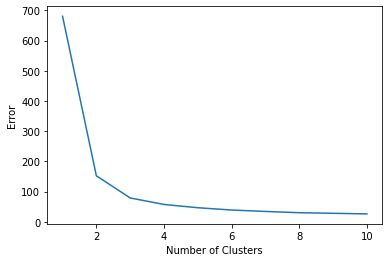

In [13]:
plt.plot(range(1,11),errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Error")
plt.show()

In [14]:
## Taking no. of clusters to be 3

model = KMeans(n_clusters = 3)
preds = model.fit_predict(X)

In [15]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [16]:
X_data['cluster'] = preds

In [17]:
X_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [18]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Clusters with Sepal Length and Sepal Width as parameters

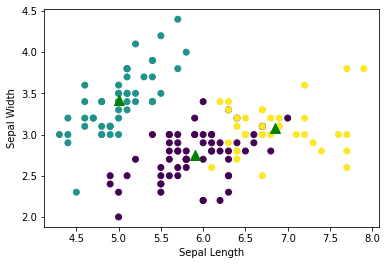

In [19]:
plt.scatter(x=X_data['SepalLengthCm'], y = X_data['SepalWidthCm'],c = X_data['cluster'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker = '^',s = 100,color = 'green')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

#### The centres of the three clusters are marked as triangles. 

### Clusters with Petal Length and Petal Width as parameters

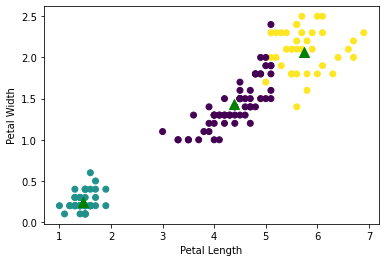

In [20]:
plt.scatter(x=X_data['PetalLengthCm'], y = X_data['PetalWidthCm'],c = X_data['cluster'])
plt.scatter(model.cluster_centers_[:,2],model.cluster_centers_[:,3],marker = '^',s = 100,color = 'green')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()